<a href="https://colab.research.google.com/github/iaglourenco/fiap-tech-challenges/blob/main/Tech_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tech Challenge - Fase 1

## O problema

Você é um(a) profissional encarregado(a) de desenvolver um modelo
preditivo de regressão para prever o valor dos custos médicos individuais
cobrados pelo seguro de saúde.
A base de dados para este desafio pode ser algo como o demonstrado no
exemplo a seguir:

```
idade,gênero,imc,filhos,fumante,região,encargos
56,feminino,29.774373714007336,2,sim,sudoeste,31109.88976
3423336
46,masculino,25.857394655216346,1,não,nordeste,26650.7026
46642694
32,masculino,23.014839993647488,0,não,sudoeste,21459.0379
9039332
```
Você precisa apenas alimentá-la com mais informações ou utilizar outra
de sua preferência.

## Tarefas
### Exploração de dados
- Carregue a base de dados e explore suas características;
- Analise estatísticas descritivas e visualize distribuições relevantes.

### Pré-processamento de dados
- Realize a limpeza dos dados, tratando valores ausentes (se
necessário);
- Converta variáveis categóricas em formatos adequados para
modelagem.

### Modelagem

- Crie um modelo preditivo de regressão utilizando uma técnica à sua
escolha (por exemplo: Regressão Linear, Árvores de Decisão etc);
- Divida o conjunto de dados em conjuntos de treinamento e teste.

### Treinamento e avaliação do modelo
- Treine o modelo com o conjunto de treinamento.

### Validação e estatística

- Utilize métricas estatísticas para validar a eficácia do modelo (p-value,
intervalos de confiança).

### O que avaliaremos
- Apresente resultados visuais, como gráficos de previsões vs. valores
reais;
- Elabore um relatório que inclua uma análise dos resultados, insights
obtidos e validação estatística.

### Observações
- Esperamos que o modelo seja capaz de fazer previsões confiáveis dos
custos médicos individuais com base nas características fornecidas.

## Entregável

Como entregável, o grupo deve enviar um vídeo junto com o link do github
do projeto e o código desenvolvido, apresentando o passo a passo do que foi
utilizado, como a fonte de dados e como os modelos foram criados.

O vídeo deve estar disponível em uma plataforma como Youtube e deve
conter até **10 minutos no máximo**.

Qualquer dúvida, não deixe de nos chamar no Discord, lá poderemos tirar
suas dúvidas e auxiliar nesta tarefa. Boa sorte!


---
# Base de dados escolhida
Medical Insurance Cost Prediction: https://www.kaggle.com/datasets/rahulvyasm/medical-insurance-cost-prediction

In [38]:
# Exploração de dados
import pandas as pd

df = pd.read_csv('./medical_insurance.csv')
df.head()

# Verifica se há dados nulos
df.info()
df.isnull().sum()

df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


,age,sex,bmi,children,smoker,region,charges
count,2772.000000,2772,2772.000000,2772.000000,2772,2772,2772.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,1406,NaN,NaN,2208,766,NaN
mean,39.109668,NaN,30.701349,1.101732,NaN,NaN,13261.369959
std,14.081459,NaN,6.129449,1.214806,NaN,NaN,12151.768945
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,26.000000,NaN,26.220000,0.000000,NaN,NaN,4687.797000
50%,39.000000,NaN,30.447500,1.000000,NaN,NaN,9333.014350
75%,51.000000,NaN,34.770000,2.000000,NaN,NaN,16577.779500


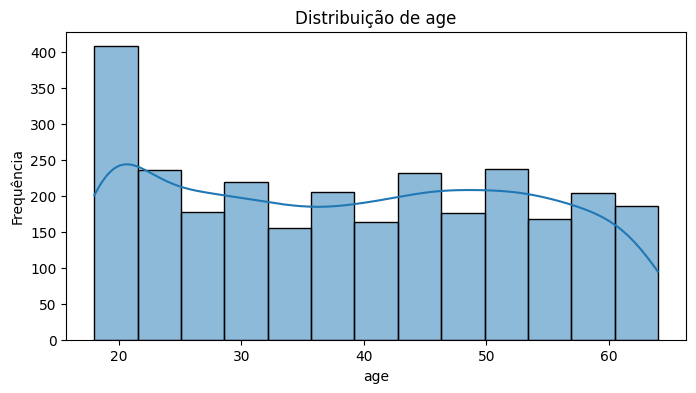

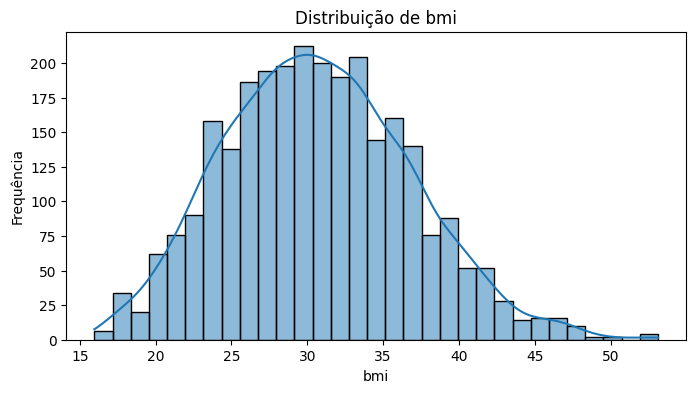

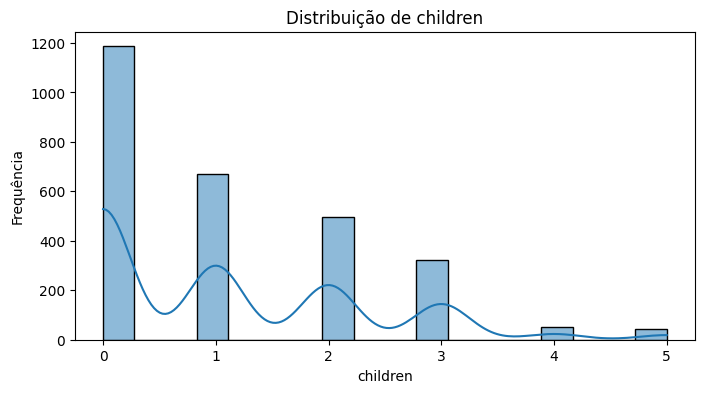

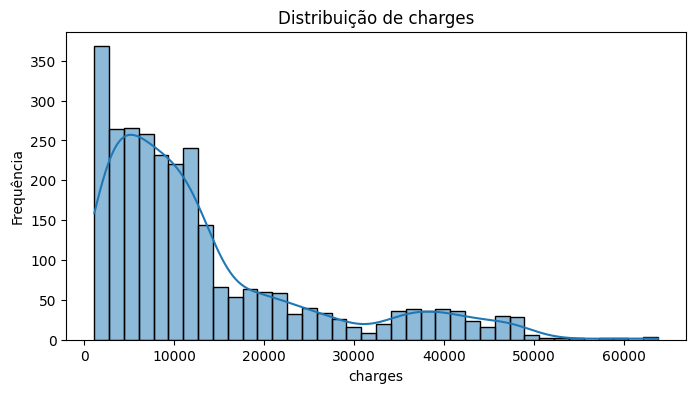

In [39]:
# Histogramas para colunas numéricas
num_cols = ['age', 'bmi', 'children', 'charges']
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.show()

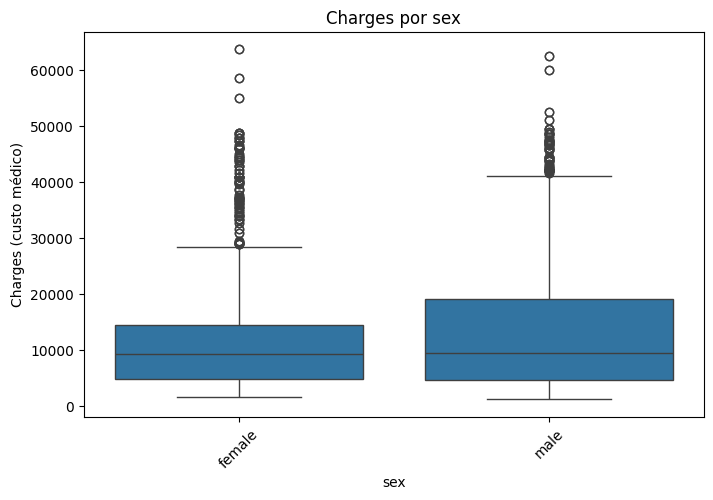

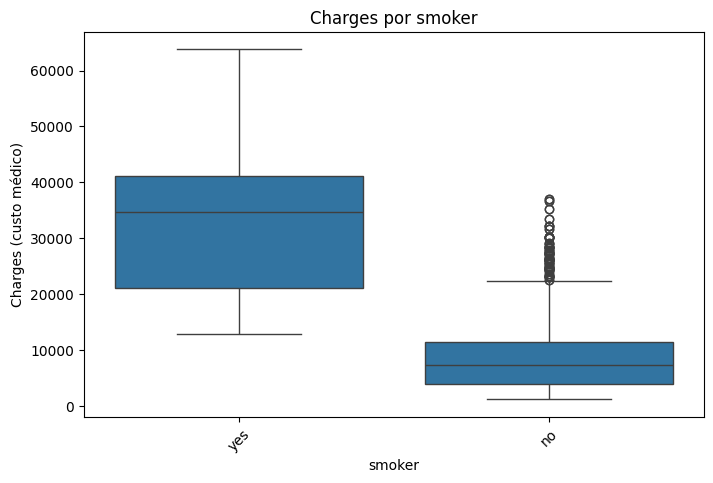

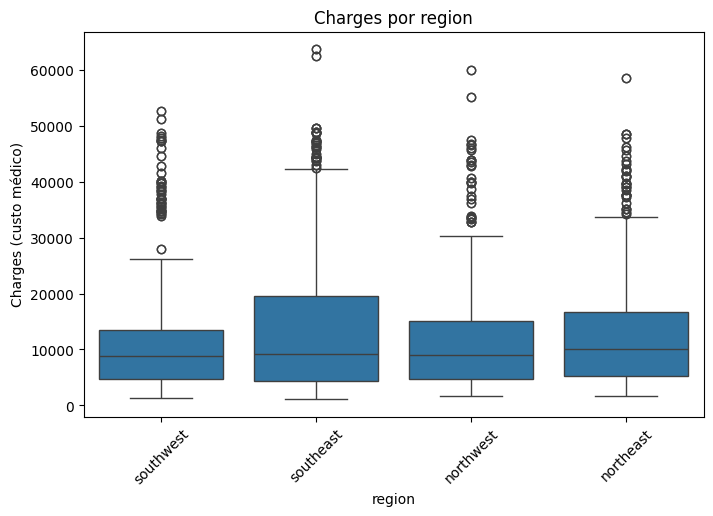

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_cols = ['sex', 'smoker', 'region']

for col in cat_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=col, y='charges', data=df)
    plt.title(f'Charges por {col}')
    plt.ylabel('Charges (custo médico)')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.show()


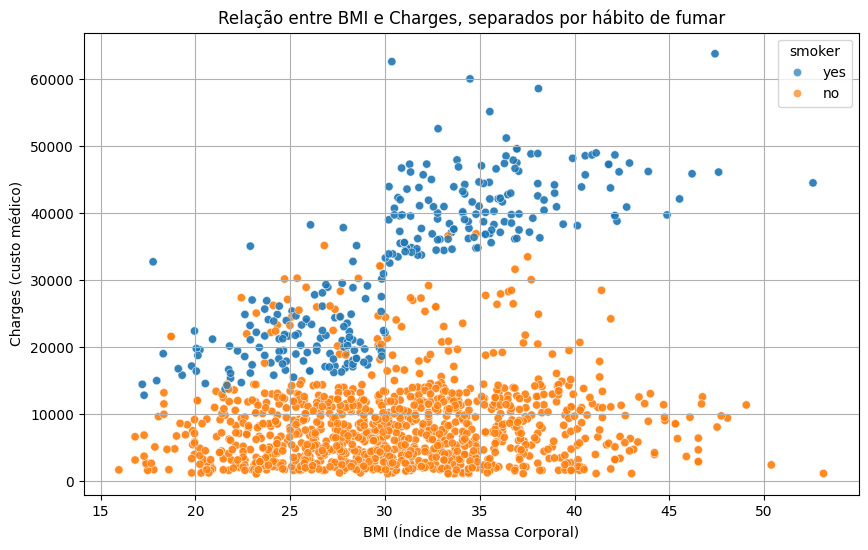

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker', alpha=0.7)

plt.title('Relação entre BMI e Charges, separados por hábito de fumar')
plt.xlabel('BMI (Índice de Massa Corporal)')
plt.ylabel('Charges (custo médico)')
plt.grid(True)
plt.show()


In [12]:
# Pré-processamento de dados

# Convertendo variáveis categóricas para numéricas e aplicando One-Hot Encoding nas regiões
# Codificação
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df = pd.get_dummies(df, columns=['region'], drop_first=True)

X = df.drop('charges', axis=1)
y = df['charges']

In [35]:
# Modelagem, treinamento e avaliação do modelo
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import accuracy_score,mean_absolute_error, mean_squared_error, r2_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


modelos = {
    "Random Forest": RandomForestRegressor(),
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "KNN": KNeighborsRegressor(),
}

resultados = {}

# Treinamento dos modelos
for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)  # Treina o modelo
    y_pred = modelo.predict(X_test)  # Faz previsões
    mae = mean_absolute_error(y_test, y_pred)  # Calcula o MAE
    mse = mean_squared_error(y_test, y_pred)  # Calcula o MSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Calcula o RMSE
    r2 = r2_score(y_test, y_pred)  # Calcula o R²


    # Armazena os resultados
    resultados[nome] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2,
    }


In [36]:
# Validação e estatística
for nome, resultados in resultados.items():
    print(f"{nome}:")
    for metrica, valor in resultados.items():
        print(f"{metrica}: {valor}")
    print()

Random Forest:
MAE: 1483.2659986919234
MSE: 10796488.822971977
RMSE: 3285.8010930322575
R²: 0.9309989999936537

Linear Regression:
MAE: 4224.767553044482
MSE: 40004195.942378715
RMSE: 6324.887030009209
R²: 0.7443308125692929

Decision Tree:
MAE: 780.1458039879809
MSE: 10906696.503108941
RMSE: 3302.528804281492
R²: 0.9302946561775742

KNN:
MAE: 6045.560657888942
MSE: 92902825.6299919
RMSE: 9638.611187821194
R²: 0.4062525347828716

